<a href="https://colab.research.google.com/github/m-agnet/Portfolio/blob/main/pressure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ファイル読み込み

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# ファイルのパスリスト
paths = [
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_volume8.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_volume27.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_volume64.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_volume125.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_volume512.txt'
]

# データのリスト
data_list = []

# データを読み込んでリストに追加
for path in paths:
    data = pd.read_table(path, sep='\s+')
    data_list.append(data)

quantity_name = 'Press'

# 共通設定の入力
thermo = 10000
t_step = 0.005

# 変える物理量
quantity_changed_name = 'volume'
quantity_changed = [ ]



In [ ]:
# 見る必要がないときはコメントアウト
# # データを出力する
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     print()

#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


In [ ]:
# データ加工の設定
start = [0,0,0,0,0]
end = [9,9,9,9,9]

# データを加工、出力、再格納、プロット
for i, data in enumerate(data_list):
    data = data.drop(range(start[i],end[i]+1))
    data_list[i] = data  # 加工後のデータを再格納


In [ ]:
# 見る必要がないときはコメントアウト
# # データ出力
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


# 変える物理量によって, 表示する統計データを変更

In [ ]:
particles = [ ]
if quantity_changed_name == 'volume':
    # 各データの粒子数
    volume = [8, 27, 64, 125, 512]
    DENSITY = 0.01
    particles = [v * DENSITY for v in volume]
    quantity_changed = volume

if quantity_changed_name == 'density':
    # 各データの粒子数
    density = [0.00015625, 0.00125, 0.01]
    VOLUME = 512
    particles = [d * VOLUME for d in density]
    quantity_changed = density

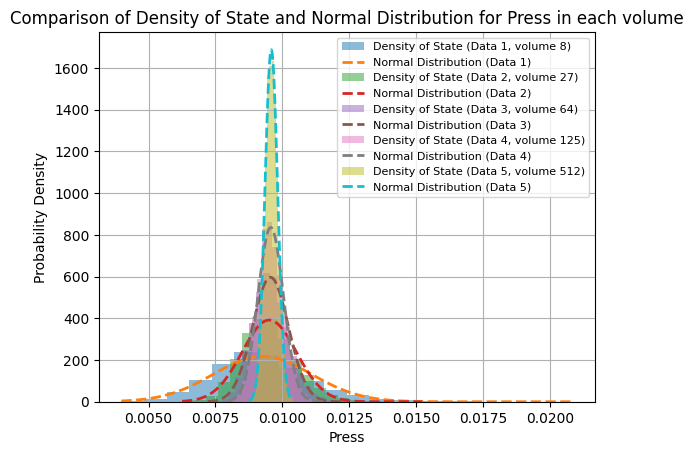

Data 1, volume 8:
Mean: 0.00925
Median: 0.00910
Standard deviation: 0.00183
Minimum value: 0.00399
Maximum value: 0.02083
Interquartile range: 0.00230

Data 2, volume 27:
Mean: 0.00951
Median: 0.00944
Standard deviation: 0.00102
Minimum value: 0.00625
Maximum value: 0.01522
Interquartile range: 0.00132

Data 3, volume 64:
Mean: 0.00956
Median: 0.00952
Standard deviation: 0.00067
Minimum value: 0.00721
Maximum value: 0.01236
Interquartile range: 0.00088

Data 4, volume 125:
Mean: 0.00956
Median: 0.00955
Standard deviation: 0.00048
Minimum value: 0.00795
Maximum value: 0.01169
Interquartile range: 0.00063

Data 5, volume 512:
Mean: 0.00959
Median: 0.00958
Standard deviation: 0.00024
Minimum value: 0.00877
Maximum value: 0.01043
Interquartile range: 0.00032



In [ ]:
# 統計情報と確率密度関数を保存するリスト
statistics_list = []
pdf_list = []
mean_list = []  # 各データの平均値を保持するリスト
std_list = []  # 各データの標準偏差を保持するリスト

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # 統計情報の計算
    mean = np.mean(quantity)
    median = np.median(quantity)
    std = np.std(quantity)
    minimum = np.min(quantity)
    maximum = np.max(quantity)
    q1, q3 = np.percentile(quantity, [25, 75])
    interquartile_range = q3 - q1

    # 確率密度関数の計算
    mu, sigma = quantity.mean(), quantity.std()
    x = np.linspace(quantity.min(), quantity.max(), 100)
    y = norm.pdf(x, mu, sigma)

    # 結果をリストに追加
    statistics = [mean, median, std, minimum, maximum, interquartile_range]
    statistics_list.append(statistics)
    pdf_list.append((x, y))
    mean_list.append(mean)
    std_list.append(std)

    # ヒストグラムの作成とプロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    label_normal = f'Normal Distribution (Data {i+1})'
    ax.hist(quantity, bins=20, density=True, alpha=0.5, label=label_density)
    ax.plot(x, y, '--', linewidth=2, label=label_normal)

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Probability Density')
ax.set_title(f'Comparison of Density of State and Normal Distribution for {quantity_name} in each {quantity_changed_name}')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()

# 統計情報の表示
for i, statistics in enumerate(statistics_list):
    print(f"Data {i+1}, {quantity_changed_name} {quantity_changed[i]}:")
    print(f"Mean: {statistics[0]:.5f}")
    print(f"Median: {statistics[1]:.5f}")
    print(f"Standard deviation: {statistics[2]:.5f}")
    print(f"Minimum value: {statistics[3]:.5f}")
    print(f"Maximum value: {statistics[4]:.5f}")
    print(f"Interquartile range: {statistics[5]:.5f}")
    print()




Mean values for each data:
Data 1: 0.00925
Data 2: 0.00951
Data 3: 0.00956
Data 4: 0.00956
Data 5: 0.00959


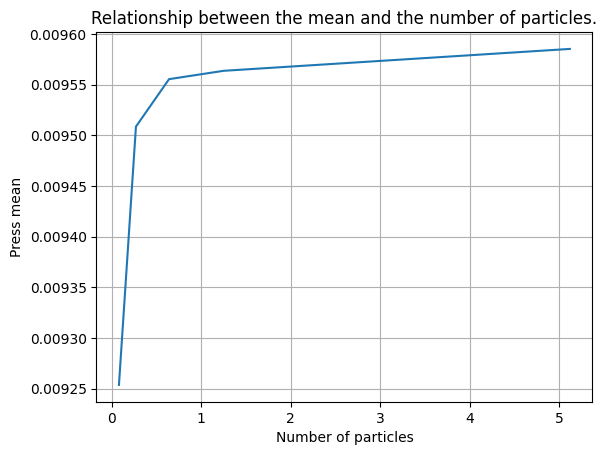

In [ ]:
# 平均値について
print("Mean values for each data:")
for i, mean_value in enumerate(mean_list):
    print(f"Data {i+1}: {mean_value:.5f}")


plt.plot(particles, mean_list)
plt.title('Relationship between the mean and the number of particles.')
plt.xlabel('Number of particles')
plt.ylabel(f'{quantity_name} mean')
plt.grid()
plt.show()


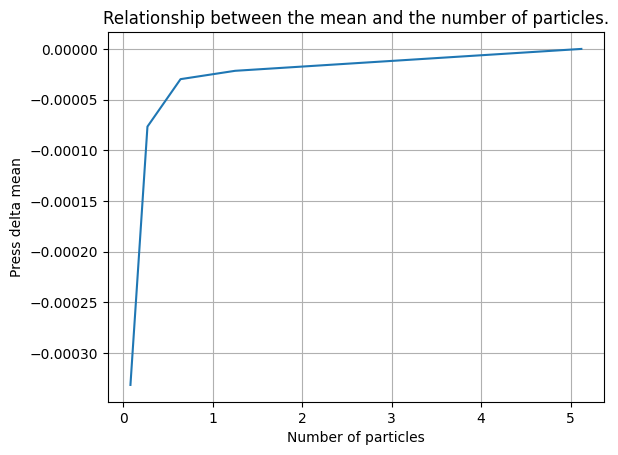

In [ ]:
# 平均値の収束性について
delta_mean = [ ]
delta_mean = [m - mean_list[-1] for m in mean_list]

plt.plot(particles, delta_mean)
plt.title('Relationship between the mean and the number of particles.')
plt.xlabel('Number of particles')
plt.ylabel(f'{quantity_name} delta mean')
plt.grid()
plt.show()


Stndard deviation for each data:
Data 1: 0.00183
Data 2: 0.00102
Data 3: 0.00067
Data 4: 0.00048
Data 5: 0.00024


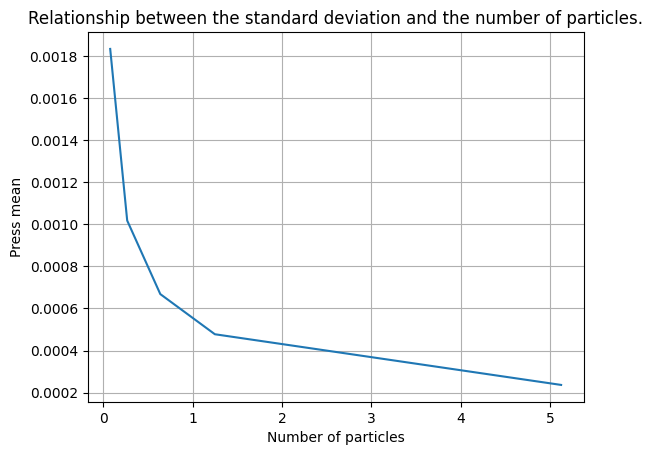

In [ ]:
# 標準偏差について
print("Stndard deviation for each data:")
for i, std_value in enumerate(std_list):
    print(f"Data {i+1}: {std_value:.5f}")



plt.plot(particles, std_list)
plt.title('Relationship between the standard deviation and the number of particles.')
plt.xlabel('Number of particles')
plt.ylabel(f'{quantity_name} mean')
plt.grid()
plt.show()

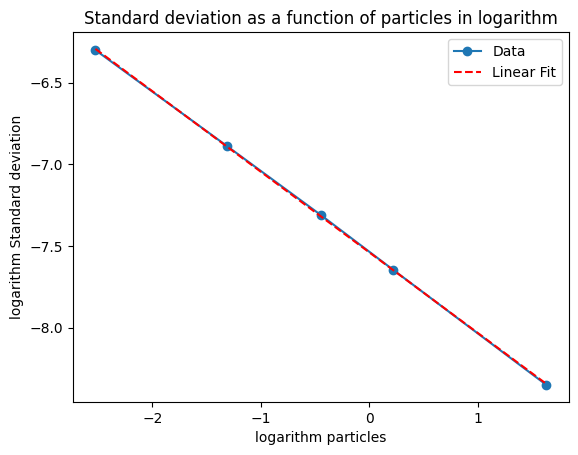

gradient=-0.49290882806007924


In [ ]:
# 標準偏差プロットを対数とって傾きをみる.
# 対数変換
x = np.log(particles)
y = np.log(std_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel('logarithm particles')
plt.ylabel('logarithm Standard deviation')
plt.title('Standard deviation as a function of particles in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")

In [ ]:
# if quantity_changed == 'volume':
#     # 各データの粒子数
#     volume = [8, 64, 512]
#     DENSITY = 0.01
#     particles = [v * DENSITY for v in volume]

#     # 統計情報と確率密度関数を保存するリスト
#     statistics_list = []
#     pdf_list = []

#     # グラフを描画するためのフィギュアを作成
#     fig, ax = plt.subplots()

#     for i, data in enumerate(data_list):
#         # データ生成
#         quantity = data[quantity_name]

#         # 統計情報の計算
#         mean = np.mean(quantity)
#         median = np.median(quantity)
#         std = np.std(quantity)
#         minimum = np.min(quantity)
#         maximum = np.max(quantity)
#         q1, q3 = np.percentile(quantity, [25, 75])
#         interquartile_range = q3 - q1

#         # 確率密度関数の計算
#         mu, sigma = quantity.mean(), quantity.std()
#         x = np.linspace(quantity.min(), quantity.max(), 100)
#         y = norm.pdf(x, mu, sigma)

#         # 結果をリストに追加
#         statistics = [mean, median, std, minimum, maximum, interquartile_range]
#         statistics_list.append(statistics)
#         pdf_list.append((x, y))

#         # ヒストグラムの作成とプロット
#         label_density = f'Density of State (Data {i+1} volume {volume[i]})'
#         label_normal = f'Normal Distribution (Data {i+1})'
#         ax.hist(quantity, bins=20, density=True, alpha=0.5, label=label_density)
#         ax.plot(x, y, '--', linewidth=2, label=label_normal)

#     # グラフを整形
#     ax.set_xlabel(quantity_name)
#     ax.set_ylabel('Probability Density')
#     ax.set_title(f'Comparison of Density of State and Normal Distribution for {quantity_name} in each volume')
#     ax.legend()
#     ax.grid()

#     # グラフを表示
#     plt.show()

#     # 統計情報の表示
#     for i, statistics in enumerate(statistics_list):
#         print(f"Data {i+1}:")
#         print(f"Mean: {statistics[0]:.5f}")
#         print(f"Median: {statistics[1]:.5f}")
#         print(f"Standard deviation: {statistics[2]:.5f}")
#         print(f"Minimum value: {statistics[3]:.5f}")
#         print(f"Maximum value: {statistics[4]:.5f}")
#         print(f"Interquartile range: {statistics[5]:.5f}")
#         print()


In [ ]:
# if quantity_changed == 'volume':


In [ ]:
# # 統計情報と確率密度関数を保存するリスト
# statistics_list = []
# pdf_list = []

# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # 統計情報の計算
#     mean = np.mean(quantity)
#     median = np.median(quantity)
#     std = np.std(quantity)
#     minimum = np.min(quantity)
#     maximum = np.max(quantity)
#     q1, q3 = np.percentile(quantity, [25, 75])
#     interquartile_range = q3 - q1

#     # 確率密度関数の計算
#     mu, sigma = quantity.mean(), quantity.std()
#     x = np.linspace(quantity.min(), quantity.max(), 100)
#     y = norm.pdf(x, mu, sigma)

#     # 結果をリストに追加
#     statistics = [mean, median, std, minimum, maximum, interquartile_range]
#     statistics_list.append(statistics)
#     pdf_list.append((x, y))

#     # ヒストグラムの作成とプロット
#     ax.hist(quantity, bins=20, density=True, alpha=0.5, label='Density of State')
#     ax.plot(x, y, '--', linewidth=2, label='Normal Distribution')

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Probability Density')
# ax.set_title(f'Comparison of Density of State and Normal Distribution of {quantity_name}')
# ax.legend()
# ax.grid()

# # グラフを表示
# plt.show()

# # 統計情報の表示
# for i, statistics in enumerate(statistics_list):
#     print(f"Data {i+1}:")
#     print(f"Mean: {statistics[0]:.5f}")
#     print(f"Median: {statistics[1]:.5f}")
#     print(f"Standard deviation: {statistics[2]:.5f}")
#     print(f"Minimum value: {statistics[3]:.5f}")
#     print(f"Maximum value: {statistics[4]:.5f}")
#     print(f"Interquartile range: {statistics[5]:.5f}")
#     print()


In [ ]:
# # 統計情報と確率密度関数を保存するリスト
# statistics_list = []
# pdf_list = []

# for i, data in enumerate(data_list):

#         # データ生成
#         quantity = data[quantity_name]

#         # 統計情報の計算
#         mean = np.mean(quantity)
#         median = np.median(quantity)
#         std = np.std(quantity)
#         minimum = np.min(quantity)
#         maximum = np.max(quantity)
#         q1, q3 = np.percentile(quantity, [25, 75])
#         interquartile_range = q3 - q1

#         # 確率密度関数の計算
#         mu, sigma = quantity.mean(), quantity.std()
#         x = np.linspace(quantity.min(), quantity.max(), 100)
#         y = norm.pdf(x, mu, sigma)

#         # 結果をリストに追加
#         statistics = [mean, median, std, minimum, maximum, interquartile_range]
#         statistics_list.append(statistics)
#         pdf_list.append((x, y))

#         # ヒストグラムの作成とプロット
#         plt.hist(quantity, bins=20, density=True, alpha=0.5, label='Density of State')
#         plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')

#         # グラフを整形
#         plt.xlabel(quantity_name)
#         plt.ylabel('Probability Density')
#         plt.title(f'Comparison of Density of State and Normal Distribution of {quantity_name} (Data {i+1})')
#         plt.legend()
#         plt.grid()

#         # グラフを表示
#         plt.show()

# # 統計情報の表示
# for i, statistics in enumerate(statistics_list):
#     print(f"Data {i+1}:")
#     print(f"Mean: {statistics[0]:.5f}")
#     print(f"Median: {statistics[1]:.5f}")
#     print(f"Standard deviation: {statistics[2]:.5f}")
#     print(f"Minimum value: {statistics[3]:.5f}")
#     print(f"Maximum value: {statistics[4]:.5f}")
#     print(f"Interquartile range: {statistics[5]:.5f}")
#     print()


In [ ]:
# # 確率密度関数を重ねてプロット
# for i, pdf in enumerate(pdf_list):
#     x, y = pdf
#     plt.plot(x, y, '--', linewidth=2, label=f'Data {i+1}')

# # グラフを整形
# plt.xlabel(quantity_name)
# plt.ylabel('State Density')
# plt.title('State Density of ' + quantity_name)
# plt.legend()

# # グラフを表示
# plt.show()



In [ ]:
# quantity = []
# mu = []
# sigma = []
# for i, data in enumerate(data_list):
#         # データ生成
#         quantity = quantity.append(data[quantity_name])

#         # ヒストグラムを作成
#         plt.hist(quantity[i], bins=20, density=True, alpha=0.5, label='Density of State')

#         # 統計情報の表示
#         print(f"Data {i+1}:")
#         print(f"Mean: {np.mean(quantity[i]):.2f}")
#         print(f"Median: {np.median(quantity[i]):.2f}")
#         print(f"Standard deviation: {np.std(quantity[i]):.2f}")
#         print(f"Minimum value: {np.min(quantity[i]):.2f}")
#         print(f"Maximum value: {np.max(quantity[i]):.2f}")
#         q1, q3 = np.percentile(quantity[i], [25, 75])
#         print(f"Interquartile range: {q3 - q1:.2f}")

#         # ヒストグラムの作成
#         n, bins, patches = plt.hist(quantity[i], bins=20, density=True)

#         # 平均値と標準偏差を求める
#         mu[i], sigma[i] = quantity[i].mean(), quantity[i].std()

#         # 正規分布の確率密度関数を作成
#         x = np.linspace(quantity[i].min(), quantity[i].max(), 100)
#         y = norm.pdf(x, mu[i], sigma[i])

#         # 正規分布の確率密度関数をプロット
#         plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')

#         # グラフを整形
#         plt.xlabel(quantity_name)
#         plt.ylabel('Probability Density')
#         plt.title(f'Comparison of Density of State and Normal Distribution of {quantity_name} (Data {i+1})')
#         plt.legend()
#         plt.grid()

#         # グラフを表示
#         plt.show()

In [ ]:
# if quantity_name == 'Press':

#     # データ生成
#     quantity = data[quantity_name] # t倍の緩和時間以前を捨てた物理量データ

#     # ヒストグラムを作成
#     plt.hist(quantity, bins=20, density=True, alpha=0.5, label='Density of State')

#     # 統計情報の表示
#     print(f"Mean: {np.mean(quantity):.2f}")
#     print(f"Median: {np.median(quantity):.2f}")
#     print(f"Standard deviation: {np.std(quantity):.2f}")
#     print(f"Minimum value: {np.min(quantity):.2f}")
#     print(f"Maximum value: {np.max(quantity):.2f}")
#     q1, q3 = np.percentile(quantity, [25, 75])
#     print(f"Interquartile range: {q3 - q1:.2f}")

#     # ヒストグラムの作成
#     n, bins, patches = plt.hist(quantity, bins=20, density=True)


#     # 平均値と標準偏差を求める
#     mu, sigma = quantity.mean(), quantity.std()

#     # 正規分布の確率密度関数を作成
#     x = np.linspace(quantity.min(), quantity.max(), 100)
#     y = norm.pdf(x, mu, sigma)

#     # 正規分布の確率密度関数をプロット
#     plt.plot(x, y, '--', linewidth=2, label='Normal Distribution')

#     # グラフを整形
#     plt.xlabel(quantity_name)
#     plt.ylabel('Probability Density')
#     plt.title('Comparison of Density of State and Normal Distribution of ' + quantity_name)
#     plt.legend()

#     plt.grid()

#     # グラフを表示
#     plt.show()


In [ ]:
# if quantity_name == 'Press':

#     # 正規分布の確率密度関数をプロット
#     plt.plot(x, y, '--', linewidth=2, label='Log State Density')

#     # グラフを整形
#     plt.xlabel(quantity_name)
#     plt.ylabel('State Density')
#     plt.title('State Density of ' + quantity_name)
#     plt.legend()

#     # グラフを表示
#     plt.show()


In [ ]:
# if quantity_name == 'Press':
#     # 確率密度関数を対数に写す
#     log_y = np.log(y)

#     # 設定の入力
#     beta = 1

#     # 関数
#     log_dos = log_y + beta * x

#     # 正規分布の確率密度関数をプロット
#     plt.plot(x, log_dos, '--', linewidth=2, label='Log State Density')

#     # グラフを整形
#     plt.xlabel(quantity_name)
#     plt.ylabel('Log State Density')
#     plt.title('Log State Density of ' + quantity_name)
#     plt.legend()

#     # グラフを表示
#     plt.show()
